## Loading data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_path = '../database.db'
engine = create_engine(f'sqlite:///{db_path}')

In [3]:
df = pd.read_sql_table('puzzles', con=engine)
df.head()

,id,code,rules,difficulty
0,1,000001,Ordnen Sie allen Buchstaben des Alphabets eine...,4
1,2,000002,Teile beide Diagramme in 12 unterschiedliche P...,2
2,3,000003,Befindet sich zwischen zwei Ziffern ein schwar...,2
3,4,000006,Hier noch die Anleitungen zu den beiden Einzel...,3
4,5,000009,Und das ist zu tun: In das Diagramm sollen Zif...,1


In [4]:
unique_difficulties = df['difficulty'].unique()

print("Unique values in 'difficulty' column after mapping and reloading:")
print(unique_difficulties)

Unique values in 'difficulty' column after mapping and reloading:
[4 2 3 1 5]


## Data imbalance

In [5]:
import matplotlib.pyplot as plt

In [6]:
def display_data_imbalance(df):
    difficulty_counts = df['difficulty'].value_counts(normalize=True) * 100 
    
    plt.figure(figsize=(6, 6)) 
    plt.pie(
        difficulty_counts, 
        labels=difficulty_counts.index, 
        autopct='%1.1f%%',  
        startangle=140,     
    )
    plt.title('Distribution of Puzzle Difficulty Levels')
    plt.axis('equal')
    plt.show()

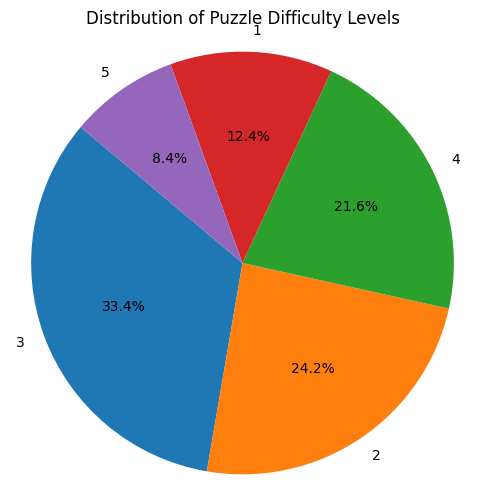

In [7]:
display_data_imbalance(df)

## Dropping non-english rule sets

In [8]:
from langdetect import detect, DetectorFactory

In [9]:
DetectorFactory.seed = 0

In [10]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [11]:
df = df[df['rules'].apply(is_english)]

print("Number of rows with English rules:", len(df))

Number of rows with English rules: 10959


In [12]:
df.head()

,id,code,rules,difficulty
0,1,000001,Ordnen Sie allen Buchstaben des Alphabets eine...,4
1,2,000002,Teile beide Diagramme in 12 unterschiedliche P...,2
5,6,00000A,Ordnen Sie allen Buchstaben des Alphabets eine...,4
12,13,00000N,Teile das L in 9 unterschiedliche Pentomino un...,2
13,14,00000O,Solve online inF-PuzzlesorCtC-app(thx Nick Smi...,4


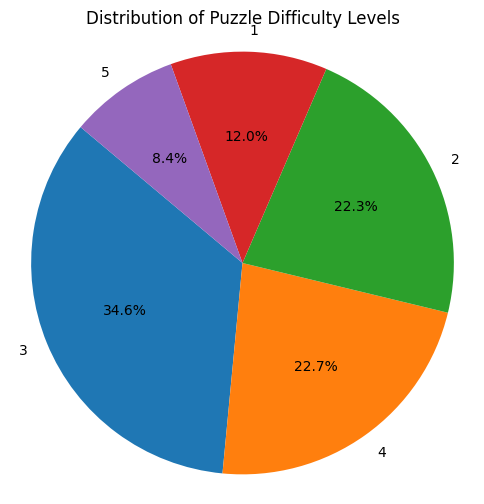

In [13]:
display_data_imbalance(df)

## Taking 10000 instances from dataframe

In [19]:
df = df.tail(10000)

print("Number of instances in the DataFrame:", len(df))

Number of instances in the DataFrame: 10000


In [20]:
df.head()

,id,code,rules,difficulty
3779,3780,0004O1,Solve on f-puzzles,4
3781,3782,0004O4,"NikoliAuthor: 红葉 (MOMIJI), from China, this qu...",2
3782,3783,0004O5,Anti-knight arrow sudoku inspired byPhistomefe...,5
3783,3784,0004O6,1. Normal Sudoku rules apply.2. Killer Cag...,3
3789,3790,0004OH,Additional KNOWLEDGE to solve this puzzle is t...,4


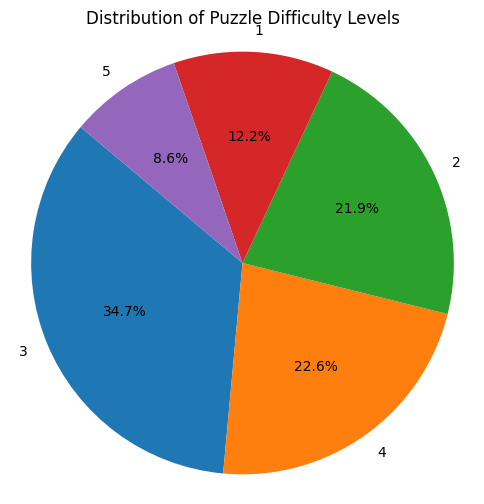

In [21]:
display_data_imbalance(df)

## Remove non-ASCII

In [24]:
import re

In [25]:
def remove_non_ascii(text):
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove non-English characters (retain only letters, numbers, and common punctuation)
    text = re.sub(r'[^A-Za-z0-9\s.,?!\'\"-]+', '', text)
    
    # Remove additional unwanted characters like newlines, tabs, etc.
    text = re.sub(r'[\n\r\t]+', ' ', text)

    text = text.strip()
    
    return text

In [26]:
df['rules'] = df['rules'].apply(lambda x: remove_non_ascii(x) if isinstance(x, str) else x)

print("Number of instances in the DataFrame:", len(df))

Number of instances in the DataFrame: 10000


In [27]:
df.head()

,id,code,rules,difficulty
3779,3780,0004O1,Solve on f-puzzles,4
3781,3782,0004O4,"NikoliAuthor MOMIJI, from China, this questio...",2
3782,3783,0004O5,Anti-knight arrow sudoku inspired byPhistomefe...,5
3783,3784,0004O6,1. Normal Sudoku rules apply.2. Killer Cages -...,3
3789,3790,0004OH,Additional KNOWLEDGE to solve this puzzle is t...,4


## Remove stopwords

In [29]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lewelotki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
def remove_stopwords(text):
    
    text = text.lower()
    
    text = re.sub(r'\b\w{1}\b', '', text) 
    
    cleaned_words = [word for word in text.split() if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

In [32]:
df['rules'] = df['rules'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)
df.head()

,id,code,rules,difficulty
3779,3780,0004O1,solve -puzzles,4
3781,3782,0004O4,"nikoliauthor momiji, china, question comes per...",2
3782,3783,0004O5,anti-knight arrow sudoku inspired byphistomefe...,5
3783,3784,0004O6,. normal sudoku rules apply.. killer cages - c...,3
3789,3790,0004OH,additional knowledge solve puzzle determinant ...,4


## Remove punctuation

In [33]:
import string

In [34]:
def remove_punctuation(text):
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    return text

In [35]:
df['rules'] = df['rules'].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)
df.head()

,id,code,rules,difficulty
3779,3780,0004O1,solve puzzles,4
3781,3782,0004O4,nikoliauthor momiji china question comes perso...,2
3782,3783,0004O5,antiknight arrow sudoku inspired byphistomefel...,5
3783,3784,0004O6,normal sudoku rules apply killer cages cages...,3
3789,3790,0004OH,additional knowledge solve puzzle determinant ...,4


## Lemmatization and tokenization

In [36]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [37]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lewelotki/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/lewelotki/nltk_data...


True

In [38]:
lemmatizer = WordNetLemmatizer()

In [39]:
def tokenize_and_lemmatize(text):
    
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [44]:
df['tokens'] = df['rules'].apply(lambda x: tokenize_and_lemmatize(x) if isinstance(x, str) else x)
df['rules'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df = df.drop('tokens', axis=1)
df.head()

,id,code,rules,difficulty
3779,3780,0004O1,solve puzzle,4
3781,3782,0004O4,nikoliauthor momiji china question come person...,2
3782,3783,0004O5,antiknight arrow sudoku inspired byphistomefel...,5
3783,3784,0004O6,normal sudoku rule apply killer cage cage must...,3
3789,3790,0004OH,additional knowledge solve puzzle determinant ...,4


## Saving raw data

In [45]:
import os

In [46]:
df_to_save = df[['rules', 'difficulty']].rename(columns={'rules': 'features', 'difficulty': 'label'})

In [48]:
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)

In [49]:
output_path = os.path.join(output_dir, 'data_raw.csv')
df_to_save.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to ../data/data_raw.csv
